# Set Up

In [1]:
%run SetUp.ipynb
%run Process_Data-wModule.ipynb

Home Directory = /home/cjpar/Work/wfe/wfey
Log Path = /home/cjpar/Work/wfe/wfey/logs/logs/
Home Directory = /home/cjpar/Work/wfe/wfey
Log Path = /home/cjpar/Work/wfe/wfey/logs/logs/
SKIPPING: /home/cjpar/Work/wfe/wfey/logs/logs/busypoll_nodb_wfey/10_1_1/latency-2026-01-06-15-24-12.out --- Problem parsing latency numbers
SKIPPING: /home/cjpar/Work/wfe/wfey/logs/logs/busypoll_db_wfey/50000_1_50/latency-2026-01-06-21-13-10.out --- Problem parsing latency numbers
SKIPPING: /home/cjpar/Work/wfe/wfey/logs/logs/busypoll_db_wfey/50000_1_50/latency-2026-01-06-22-00-56.out --- Problem parsing latency numbers
SKIPPING: /home/cjpar/Work/wfe/wfey/logs/logs/busypoll_db_wfey/100000_1_10/latency-2026-01-06-16-28-10.out --- Problem parsing latency numbers
SKIPPING: /home/cjpar/Work/wfe/wfey/logs/logs/busypoll_db_wfey/100000_1_50/latency-2026-01-06-22-50-35.out --- Problem parsing latency numbers
SKIPPING: /home/cjpar/Work/wfe/wfey/logs/logs/busypoll_db_wfey/150000_1_50/latency-2026-01-06-22-52-30.out -

## Loading DataFrames

In [2]:
bm_output = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output.pkl')
bm_output_raw = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output_raw.pkl')

bm_output_clean = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output_clean.pkl')
bm_output_clean_raw = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output_clean_raw.pkl')

cols = bm_output_clean_raw.columns  ### ?NOTE -- would a different df change the columns - i dont think so

energy_regex = re.compile("energy.*_input")
energy_cols = list(filter(energy_regex.match, cols))

bm_start_index = list(cols).index("epThread")
bm_cols = list(cols[bm_start_index:])

#print("Energy Cols: ", energy_cols)
#print("BM Cols: ", bm_cols)

# Flatten the arrays 
bm_energy_output_flat = bm_output.explode(energy_cols +["time"], ignore_index=True)
bm_energy_output_flat_raw = bm_output_clean_raw.explode(energy_cols +["time"], ignore_index=True)

bm_perf_output_flat = bm_output.explode(bm_cols, ignore_index=True)
bm_perf_output_flat_raw = bm_output_clean_raw.explode(bm_cols, ignore_index=True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(bm_output_flat_raw)

## Graph Set-Up

In [13]:
sns.set_palette("Paired")
pd.options.mode.chained_assignment = None

#eventsubset=[10, 100]
#eventsubset=[50000, 100000, 150000]
eventsubset=[0, 10, 100, 100000]
#sourceCPUsubset=["1", "10", "50"]
sourceCPUsubset=["1"]

def return_df(df):
    print("Event Rate subset: ", eventsubset)
    print("Source CPU subset: ", sourceCPUsubset)
    return df[ (df['eventrate'].isin(eventsubset)) & (df['sourceCPUs'].isin(sourceCPUsubset))].copy()

def return_config_set(df, event, scpu):
    return ( df[ (df['eventrate'] == event) & (df['sourceCPUs'] == scpu)] )

df_used = return_df(bm_output)

Event Rate subset:  [0, 10, 100, 100000]
Source CPU subset:  ['1']


# Graphs -- Overview

## Heat Map

### Events, Latency, & Subset of Event Cores

Event Rate subset:  [0, 10, 100, 100000]
Source CPU subset:  ['1']


<Axes: >

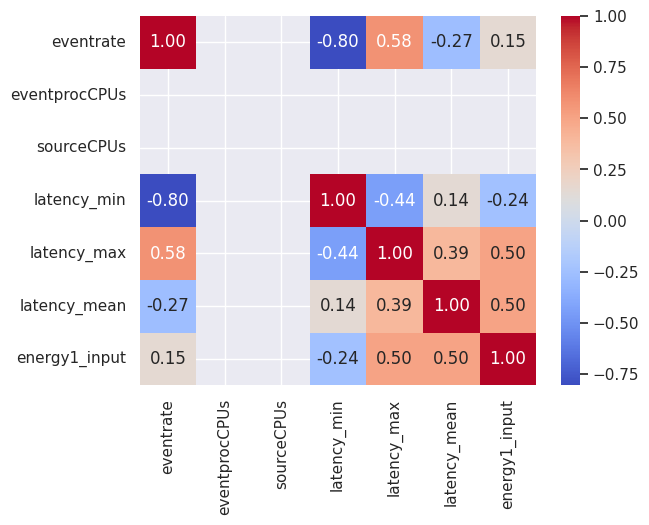

In [14]:
df_used = return_df(bm_energy_output_flat_raw)

common_cols = ['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean']
output_cols = common_cols + ['energy1_input']
corr = df_used[output_cols].corr()

#fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

### Events, Latency, & All Cores

In [15]:
## NOTE -- this is insane dont load this
df_used = return_df(bm_energy_output_flat_raw)

common_cols = ['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean']
output_cols = common_cols + energy_cols
corr = df_used[output_cols].corr()
fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

Event Rate subset:  [0, 10, 100, 100000]
Source CPU subset:  ['1']


<Axes: >

### Events, Latency, & BM Output

Event Rate subset:  [0, 10, 100, 100000]
Source CPU subset:  ['1']


<Axes: >

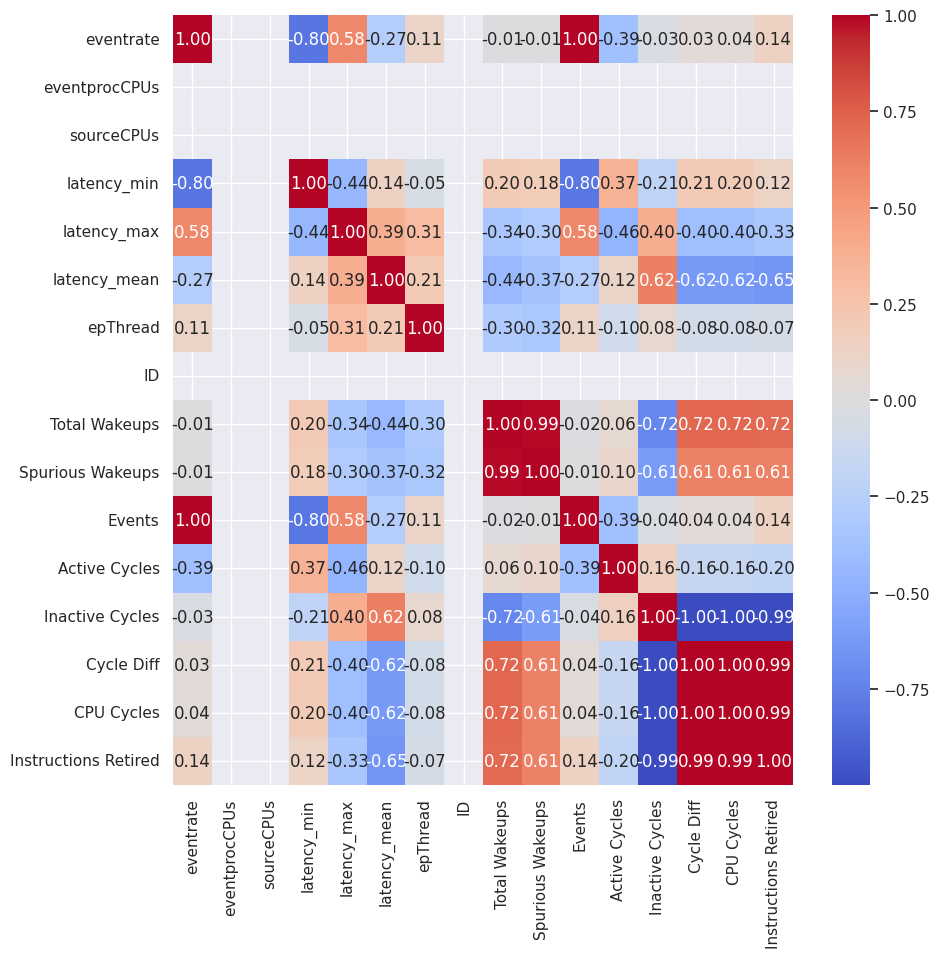

In [16]:
df_used = return_df(bm_perf_output_flat_raw)
output_cols = common_cols + bm_cols
corr = df_used[output_cols].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

## Correlations with the HW Monitor Numbers

### HWMON2

#### Power Graphs

##### Choosing subsets of plots

In [17]:
#eventsubset=[10, 100]
#eventsubset=[50000, 100000, 150000]
eventsubset=[10, 100, 100000]
#sourceCPUsubset=["1", "10", "50"]

##### Power values over time -- Differentiated by EventRate

Event Rate subset:  [10, 100, 100000]
Source CPU subset:  ['1']


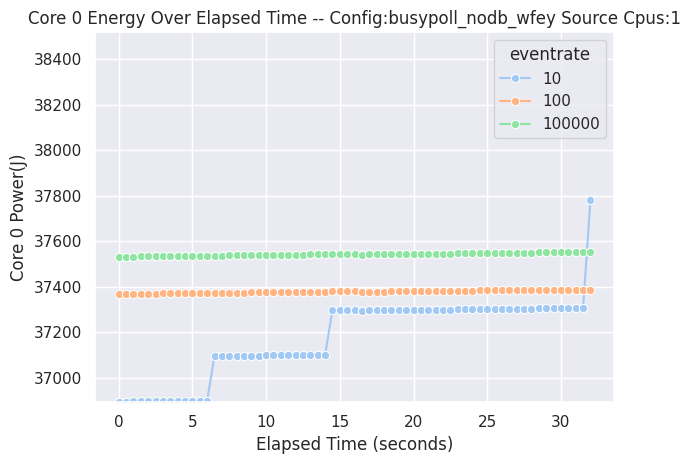

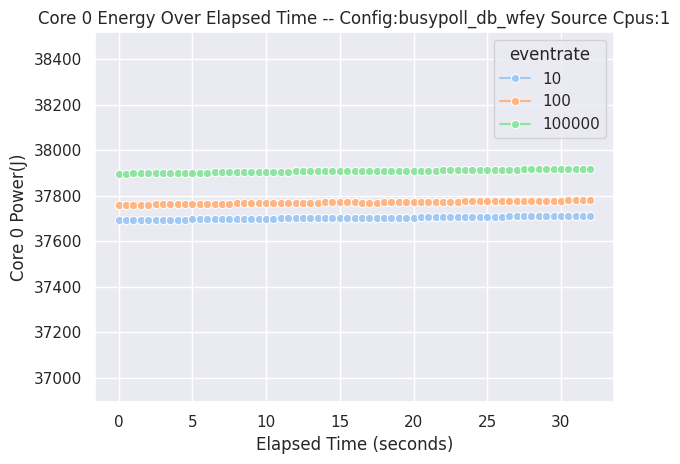

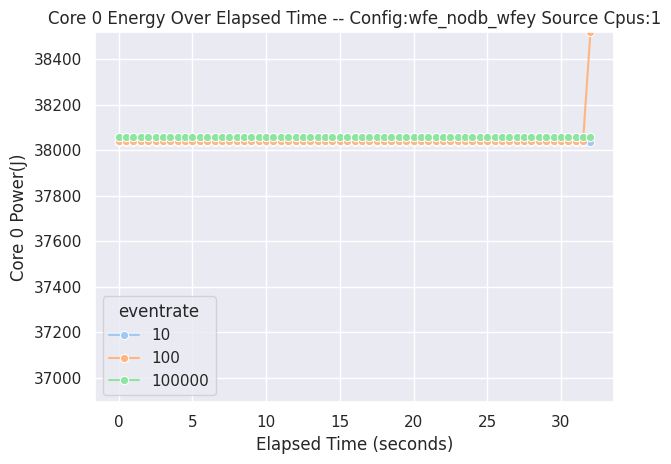

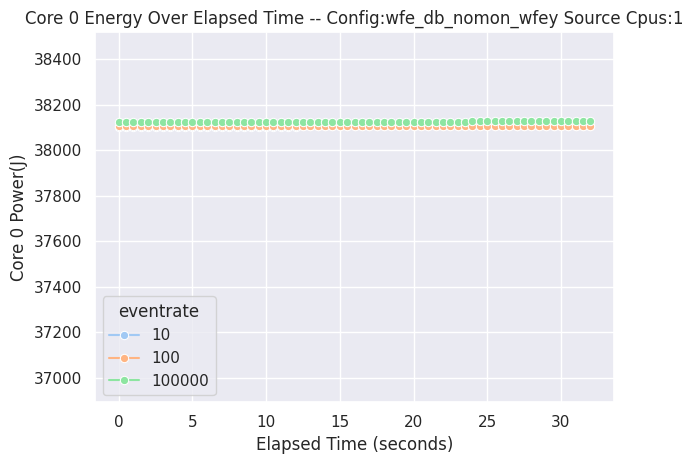

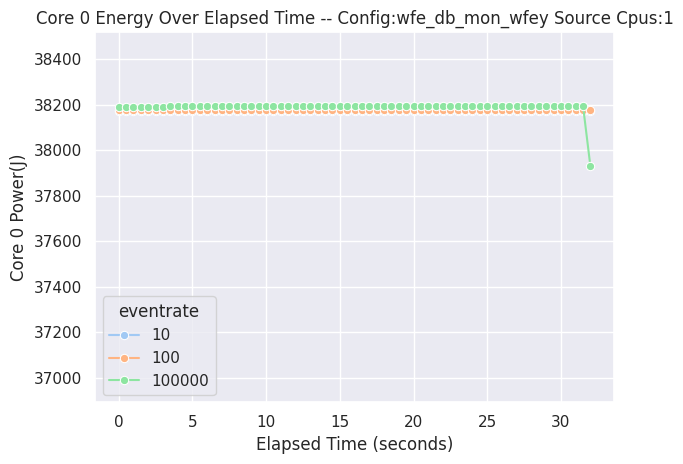

In [18]:
df_used = return_df(bm_energy_output_flat_raw) ## NOTE -- If it's over time, it doesnt make sense to not be raw

config_set = None

for c in CONFIGS:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = df_used[ (df_used['configs'] == c) &
                                (df_used['sourceCPUs'] == sc)]

        sns.lineplot(
            data=config_set, 
            x='time',
            y='energy1_input',
            hue='eventrate',
            palette='pastel',
            marker='o', 
            errorbar=None
        )
        
        plt.title('Core 0 Energy Over Elapsed Time -- Config:'+c+' Source Cpus:'+sc)
        plt.xlabel('Elapsed Time (seconds)')
        plt.ylabel('Core 0 Power(J)')
        plt.ylim(df_used['energy1_input'].min(),df_used['energy1_input'].max())
        plt.tight_layout()

##### Power values over time -- Differentiated by Config

Event Rate subset:  [10, 100, 100000]
Source CPU subset:  ['1']


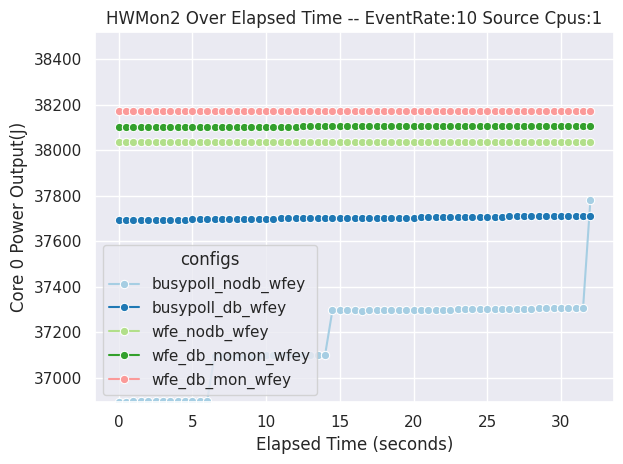

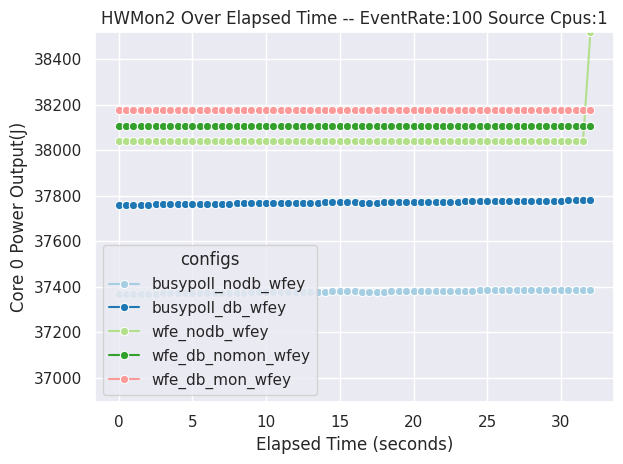

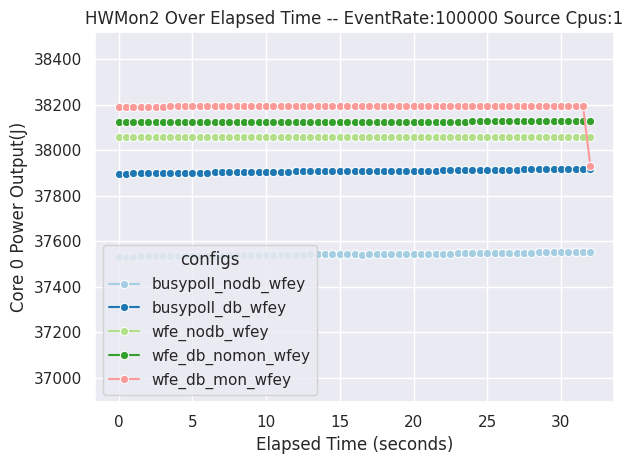

In [19]:
df_used = return_df(bm_energy_output_flat_raw)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)

        sns.lineplot(
        data=config_set, 
            x='time',
            y='energy1_input',
            hue='configs',
            marker='o',        
            errorbar=None
        )
    
        plt.title('HWMon2 Over Elapsed Time -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Elapsed Time (seconds)')
        plt.ylabel('Core 0 Power Output(J)')
        plt.ylim(df_used['energy1_input'].min(),df_used['energy1_input'].max())
        plt.tight_layout()

##### Min/Max/Mean per Config

Event Rate subset:  [10, 100, 100000]
Source CPU subset:  ['1']


<Figure size 640x480 with 0 Axes>

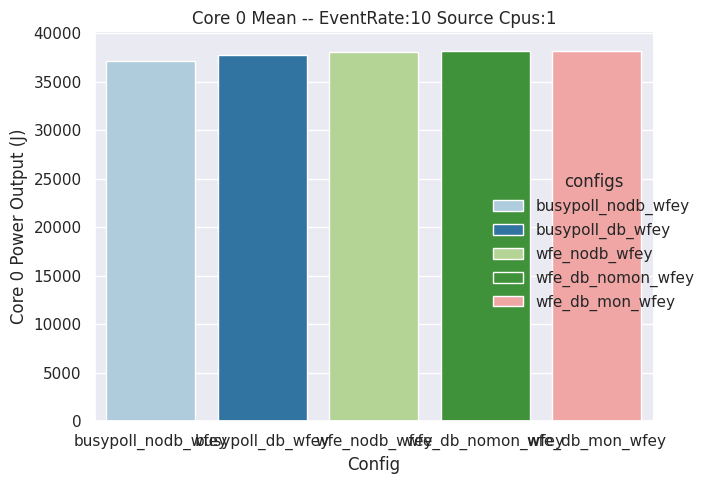

<Figure size 640x480 with 0 Axes>

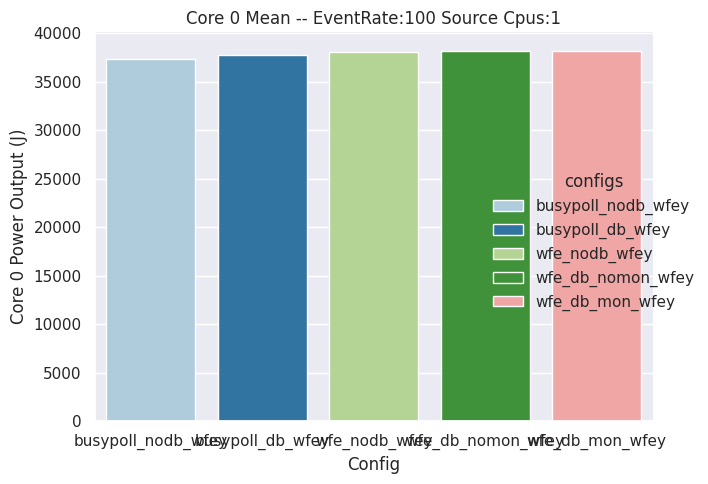

<Figure size 640x480 with 0 Axes>

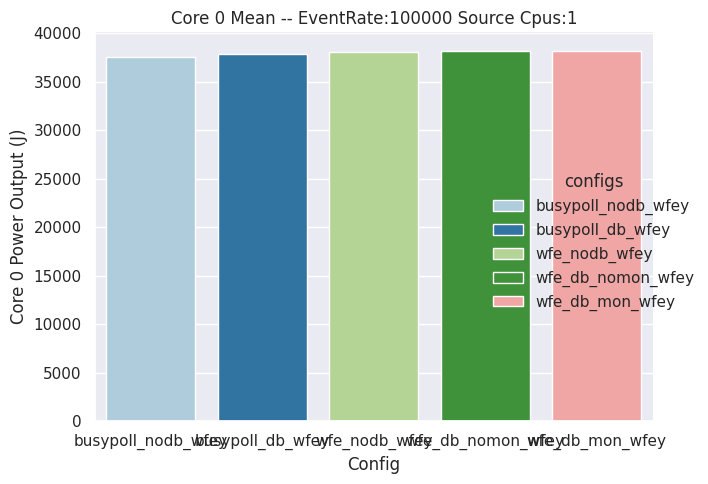

In [20]:
df_used = return_df(bm_energy_output_flat_raw)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)


        key = str(e)+"_"+str(sc)
        
        try:
            g = sns.catplot(
            data=config_set, 
            kind="bar",
            x='configs',
            y='energy1_input',
            hue='configs',
            legend=True,
            errorbar=None
            )
        except Exception as exc:
            print(f"{key}: {exc.__class__.__name__}")
            continue

        #sns.scatterplot(data=config_set, x='configs', y='hwmon2_min', hue='configs', legend=False)

        #sns.scatterplot(data=config_set, x='configs', y='hwmon2_max', hue='configs', legend=False)

        #g.fig.get_axes()[0].set_yscale('log')
    
        plt.title('Core 0 Mean -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Config')
        plt.ylabel('Core 0 Power Output (J)')
        #plt.ylim(df_used['energy1_input'].min(),df_used['energy1_input'].max()) # use this to arg set per config
        #plt.ylim(config_set['hwmon2_min'].min(),config_set['hwmon2_max'].max()) # use this to compare the configs per arg set
        plt.tight_layout()

##### Min/Max/Mean per EventRate

Event Rate subset:  [10, 100, 100000]
Source CPU subset:  ['1']


<Figure size 640x480 with 0 Axes>

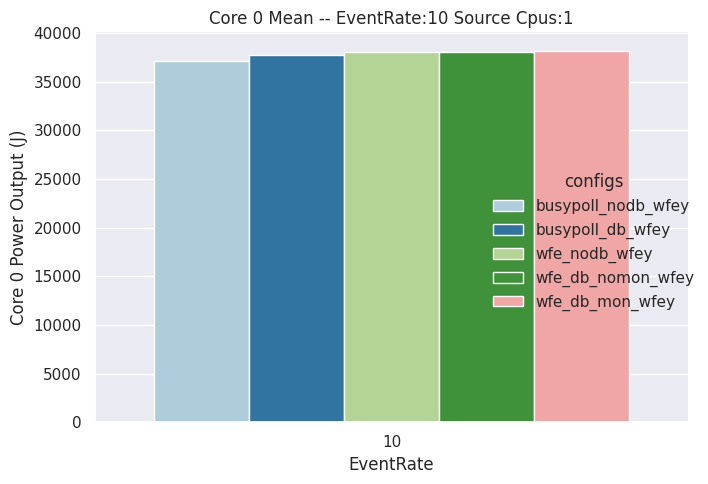

<Figure size 640x480 with 0 Axes>

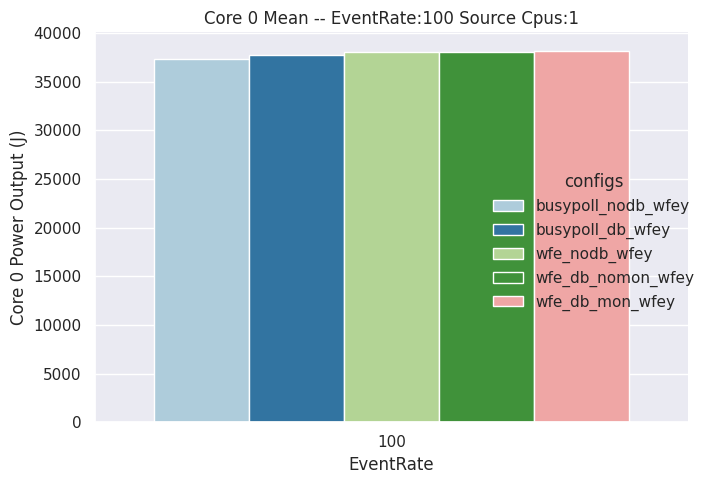

<Figure size 640x480 with 0 Axes>

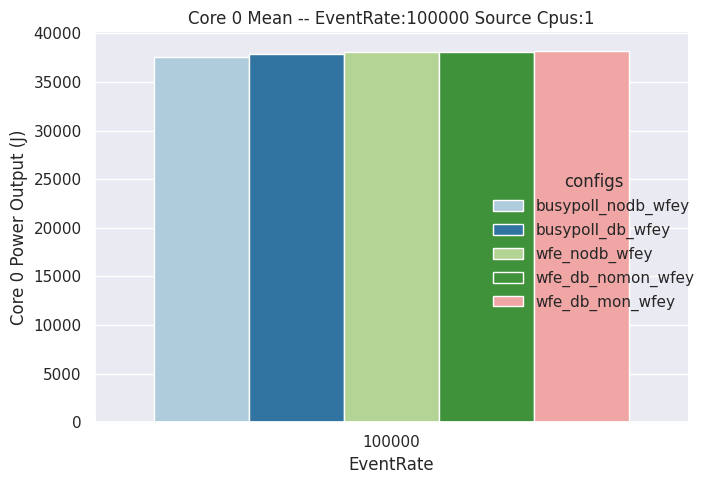

In [21]:
df_used = return_df(bm_energy_output_flat_raw)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)


        key = str(e)+"_"+str(sc)
        
        try:
            g = sns.catplot(
            data=config_set, 
            kind="bar",
            x='eventrate',
            y='energy1_input',
            hue='configs',
            legend=True,
            errorbar=None
            )
        except Exception as exc:
            print(f"{key}: {exc.__class__.__name__}")
            continue

        #sns.scatterplot(data=config_set, x='configs', y='hwmon2_min', hue='configs', legend=False)

        #sns.scatterplot(data=config_set, x='configs', y='hwmon2_max', hue='configs', legend=False)

        #g.fig.get_axes()[0].set_yscale('log')
    
        plt.title('Core 0 Mean -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('EventRate')
        plt.ylabel('Core 0 Power Output (J)')
        #plt.ylim(df_used['energy1_input'].min(),df_used['energy1_input'].max()) # use this to arg set per config
        #plt.ylim(config_set['hwmon2_min'].min(),config_set['hwmon2_max'].max()) # use this to compare the configs per arg set
        plt.tight_layout()

##### Power Differences

Event Rate subset:  [10, 100, 100000]
Source CPU subset:  ['1']
0     37300.1169
15    37706.4123
30    38036.5680
45    38104.0042
60    38171.5943
Name: energy1_input, dtype: float64
0     403.262355
15     12.291100
30      0.599200
45      0.584600
60      0.586100
Name: energy1_input, dtype: float64
3     37382.3570
18    37774.4080
33    38039.9910
48    38107.3618
63    38174.9527
Name: energy1_input, dtype: float64
0     403.262355
15     12.291100
30      0.599200
45      0.584600
60      0.586100
Name: energy1_input, dtype: float64
9     37546.3197
24    37912.0745
39    38058.7134
54    38125.7258
69    38193.1129
Name: energy1_input, dtype: float64
0     403.262355
15     12.291100
30      0.599200
45      0.584600
60      0.586100
Name: energy1_input, dtype: float64


<Figure size 640x480 with 0 Axes>

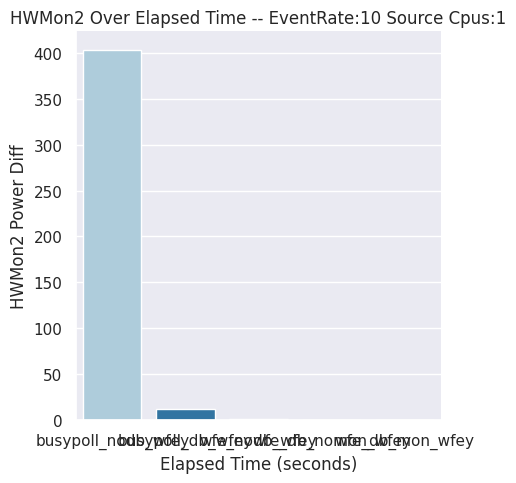

<Figure size 640x480 with 0 Axes>

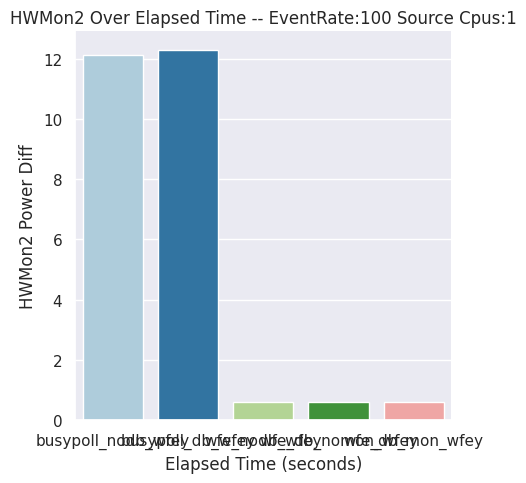

<Figure size 640x480 with 0 Axes>

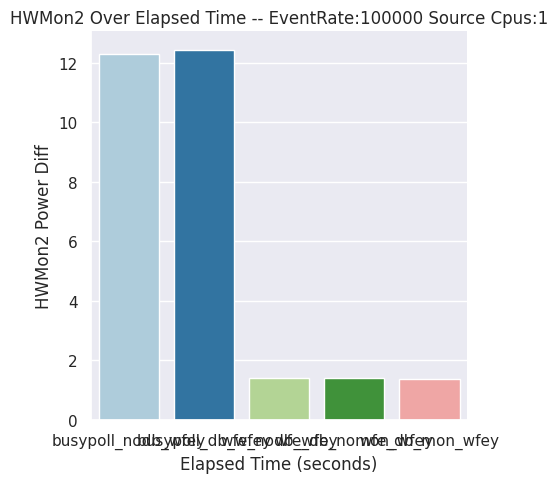

In [63]:
df_used = return_df(bm_output_clean)
config_set = None

#print(df_used['energy1_input'].iloc[-1]-df_used['energy1_input'].iloc[0])

#total_diff_set = df_used.assign( hwmon2_diff = df_used['energy1_input'].iloc[-1]-df_used['energy1_input'].iloc[0] )
total_diff_set= df_used['energy1_input'].iloc[-1]-df_used['energy1_input'].iloc[0]

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)
        #diff_set = config_set.assign( hwmon2_diff = config_set['hwmon2_max'] - config_set['hwmon2_min'] )
        
        #diff_set = config_set.assign( hwmon2_diff = config_set['hwmon2_max'] - config_set['hwmon2_min'] )
        #print(config_set)
        print(config_set['energy1_input'].apply(lambda arr: arr[-1]))
        diff_set = config_set.assign( energy1_diff = config_set['energy1_input'].apply(lambda arr: arr[-1])-config_set['energy1_input'].apply(lambda arr: arr[0]))
        print(energy1_diff)
        sns.catplot(
            data=diff_set, 
            kind="bar",
            x='configs',
            y='energy1_diff',
            hue='configs',
            errorbar=None
        )
    
        plt.title('HWMon2 Over Elapsed Time -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Elapsed Time (seconds)')
        plt.ylabel('HWMon2 Power Diff')
        #plt.ylim(0,total_diff_set['hwmon2_diff'].max())
        plt.tight_layout()

##### Total Watts Used

In [ ]:
df_used = return_df(bm_output_clean)

total_sum_set = df_used.assign( hwmon2_total = [sum(x) for x in df_used['energy1_input']] )


for e in eventsubset:
    for sc in sourceCPUsubset:
        config_set = None
        plt.figure()
        
        config_set = return_config_set(df_used, e, sc)

        if config_set.empty:
            key = str(e)+"_"+str(sc)
            print(key, "is empty! SKIPPING")
            continue

        sum_set = config_set.copy()
        sum_set['energy1_input_total'] =config_set['energy1_input'].apply(sum)

        sns.catplot(
            data=sum_set, 
            kind="bar",
            x='configs',
            y='energy1_input_total',
            hue='configs',
            errorbar=None
        )
        
        min_y = sum_set['energy1_input_total'].min()
        #min_y = total_sum_set['hwmon2_total'].min()
        max_y = sum_set['energy1_input_total'].max()
        #max_y = total_sum_set['hwmon2_total'].max()
        mindim = 10**(int(math.log10(min_y))-1)
        maxdim = 10**(int(math.log10(max_y))-1)

        plt.title('HWMon2 Total Wattage -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Configs')
        plt.ylabel('HWMon Wattage Total (uW)')
        plt.ylim(min_y-mindim, max_y+maxdim)
        #plt.tight_layout()
        #plt.figure(figsize=(6, 4))

#### Latency Graphs

##### Choosing subsets of plots

In [ ]:
#eventsubset=[10, 100]
#eventsubset=[50000, 100000, 150000]
#sourceCPUsubset=["1", "10", "50"]

df_used = return_df(bm_output_clean)

#### Average Latency Numbers across all arg configs for each wfey Config

In [ ]:
sns.violinplot(data=df_used, x='eventrate', y='latency_mean', hue='configs')
#print(df_used[ ( df_used['eventrate'] == 1000) & (df_used['configs'] == 'wfe_db_nomon_wfey')].loc[:, ['KEY', 'latency_mean']])

In [ ]:
sns.violinplot(data=df_used, x='eventrate', y='latency_min', hue='configs')

In [ ]:
sns.violinplot(data=df_used, x='eventrate', y='latency_max', hue='configs')

##### Min/Max/Mean per Config

In [ ]:
df_used = return_df(bm_output_clean)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)

        key = str(e)+"_"+str(sc)
        try:
            g = sns.catplot(
            data=config_set, 
            kind="bar",
            x='configs',
            y='latency_mean',
            hue='configs',
            legend=True,
            errorbar=None
            )
        except Exception as exc:
            print(f"{key}: {exc.__class__.__name__}")
            continue

        sns.scatterplot(
        data=config_set,
        x='configs',
        y='latency_min',
        hue='configs',
        legend=False
        )

    
        plt.title('Latency Mean -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Config')
        plt.ylabel('Latency(ns)')
        #plt.ylim(0,config_set['latency_mean'].max())
        plt.ylim(0,df_used['latency_mean'].max())
        plt.tight_layout()

### HWMON 3